<big><b>희소 표현 원-핫 인코딩</b></big> 단점<br>
&nbsp;&nbsp;&nbsp;단어의 갯수만큼 단어의 차원이 급증<br>
&nbsp;&nbsp;&nbsp;단어 간 유사도를 계산할 수 없음<br><br>

# *분산 표현(밀집 표현)*

분포 가설이라는 가정 하에 만들어진 표현 방법<br>
<b>"비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다"</b><br><br>
- 단어를 표현하기 위해 사용자가 설정한 차원을 가지는 벡터로 저차원에 단어 의미를 <u>여러 차원에 분산으로 표현</u>, 각 차원은 실수형을 가짐<br>
<blockquote>ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;강아지 = [0.2 0.3 0.5 0.7 0.2 ... 중략 ... 0.2]</blockquote>

# 

# *CBOW(Continous Bag of Words)*

주변에 있는 단어들로 중간에 있는 단어들을 예측<br><br>
<b>"The fac cat sat on the mat"</b><br>
sat을 예측할 때, 예측하는 단어를 <big><b>중심 단어(center word)</b></big>, 예측에 사용되는 단어를 <big><b>주변 단어(context word)</b></big>라 함<br><br>
아래 그림은 앞, 뒤로 몇 개씩 단어를 볼지 결정하는 <big><b>윈도우(window)</b></big>를 2라고 설정한 경우<br>
<big><b>슬라이딩 윈도우(Sliding window)</b></big> : 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만드는 것
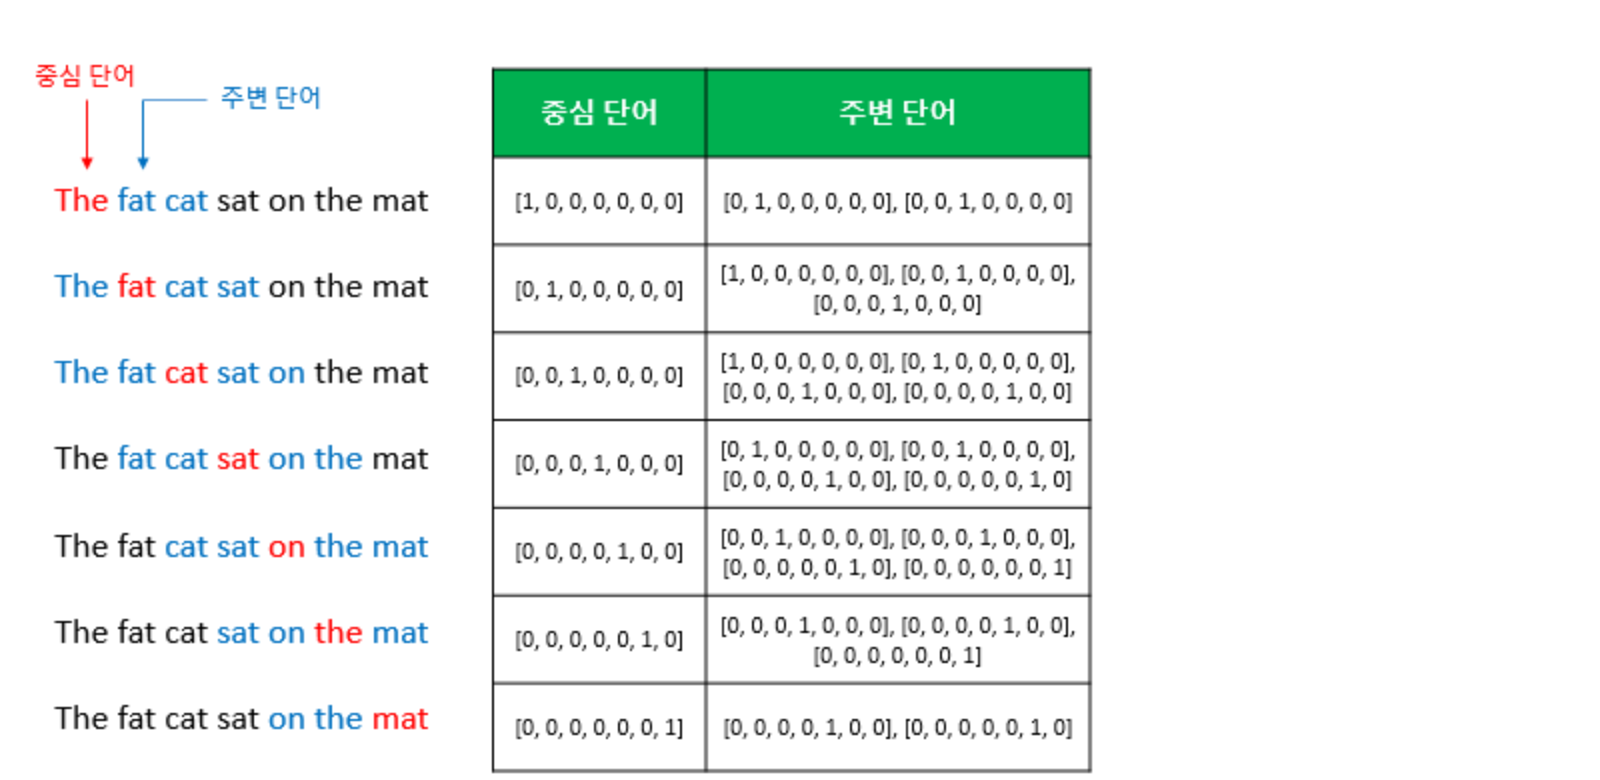

### *CBOW 인공 신경망*
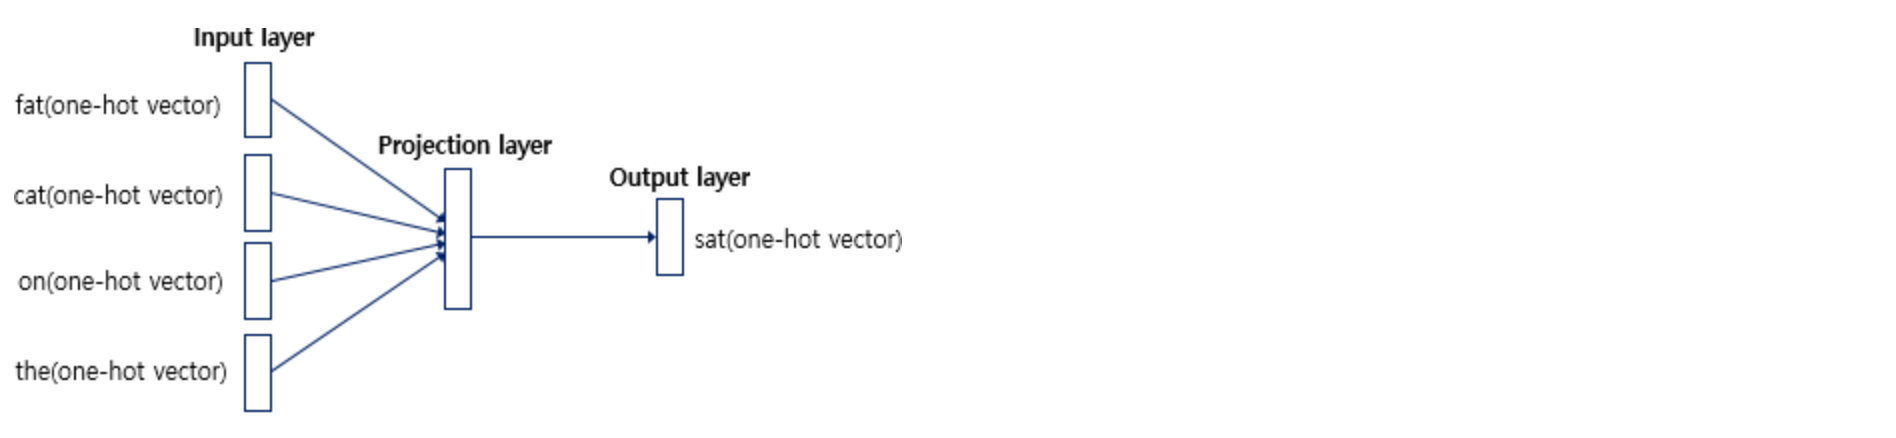
Word2vec은 은닉층이 1개 이므로 심층 신경망(Deep Neural Network)이 아닌 <b>얕은 신경망(Shallow Neural Network)</b><br>
또한, Word2vec의 은닉층은 일반 은닉층과 다르게 <u>활성화 함수가 없고</u>, <b>룩업 테이블</b>이라는 연산을 담당하는 층으로<br>
일반 은닉층과 구분하기 위해 <big><b>투사층(Projection Layer)</b></big>라고도 함<br><br>
<b>입력층 입력</b> : 윈도우 크기 범위 안의 주변 단어의 원-핫 벡터<br>
<b>출력층</b> : 예측하고자 하는 중간 단어의 원-핫 벡터<br><br>

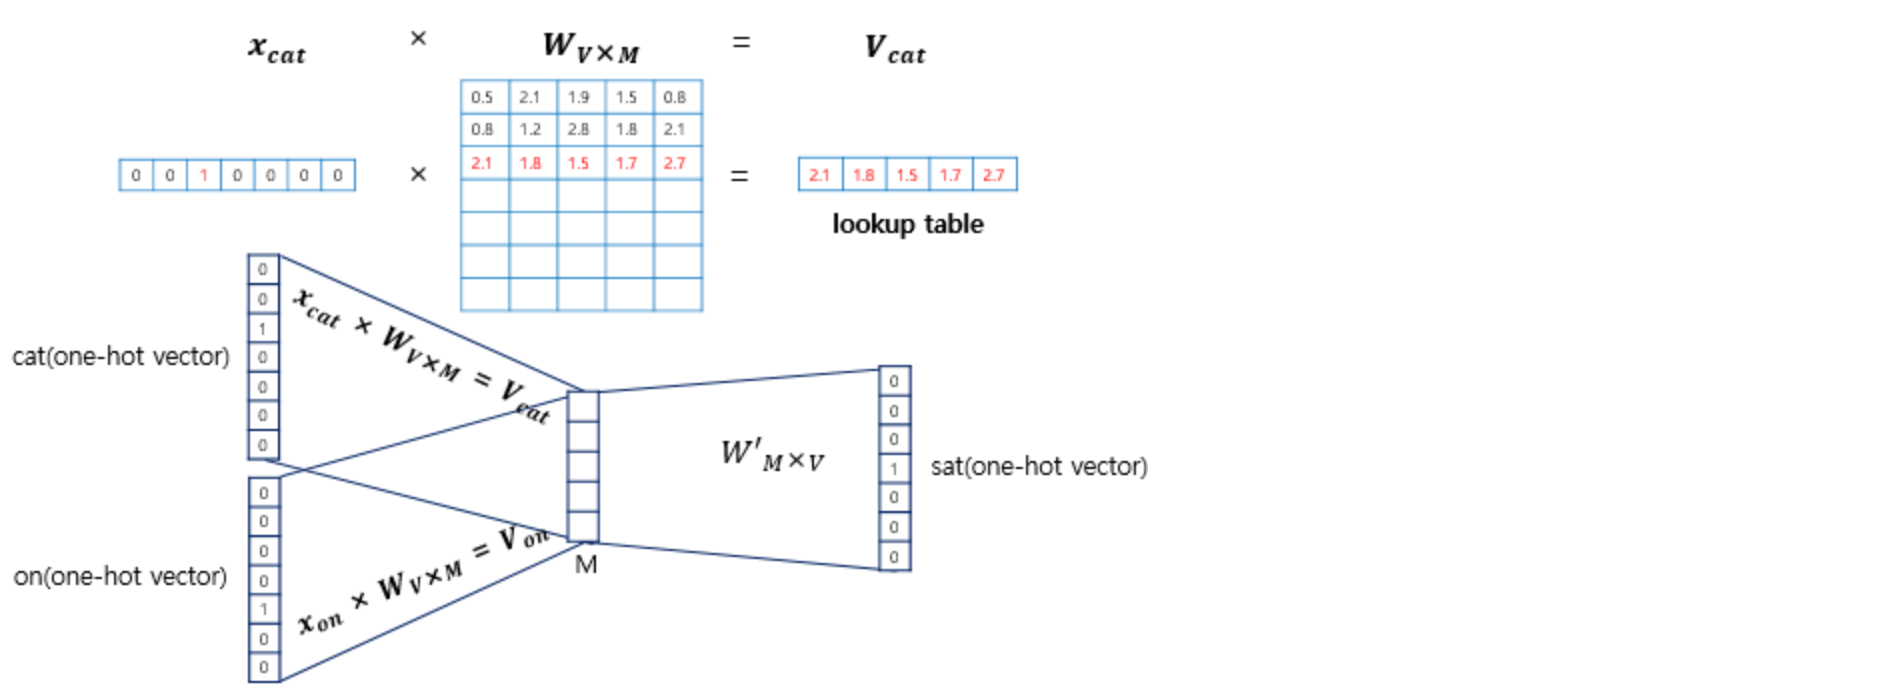
<blockquote>투사층의 크기가 M</blockquote>
<blockquote>입력층과 투사층 사이의 가중치 W는 V * M<br>
투사층과 출력층 사이의 가중치 W'는 M * V</blockquote><br>
i번째 인덱스가 1이라는 값을 가지고 그 외의 0의 값을 가지는 입력 벡터와 가중치 W 행렬의 곱은<br>
<u>W 행렬의 i번째 행을 그대로 읽어오는 것(lookup)</u>과 동일하므로 <b>lookup table</b>이라고 함

#### CBOW의 목적은 W, W'를 잘 훈련시키는 것

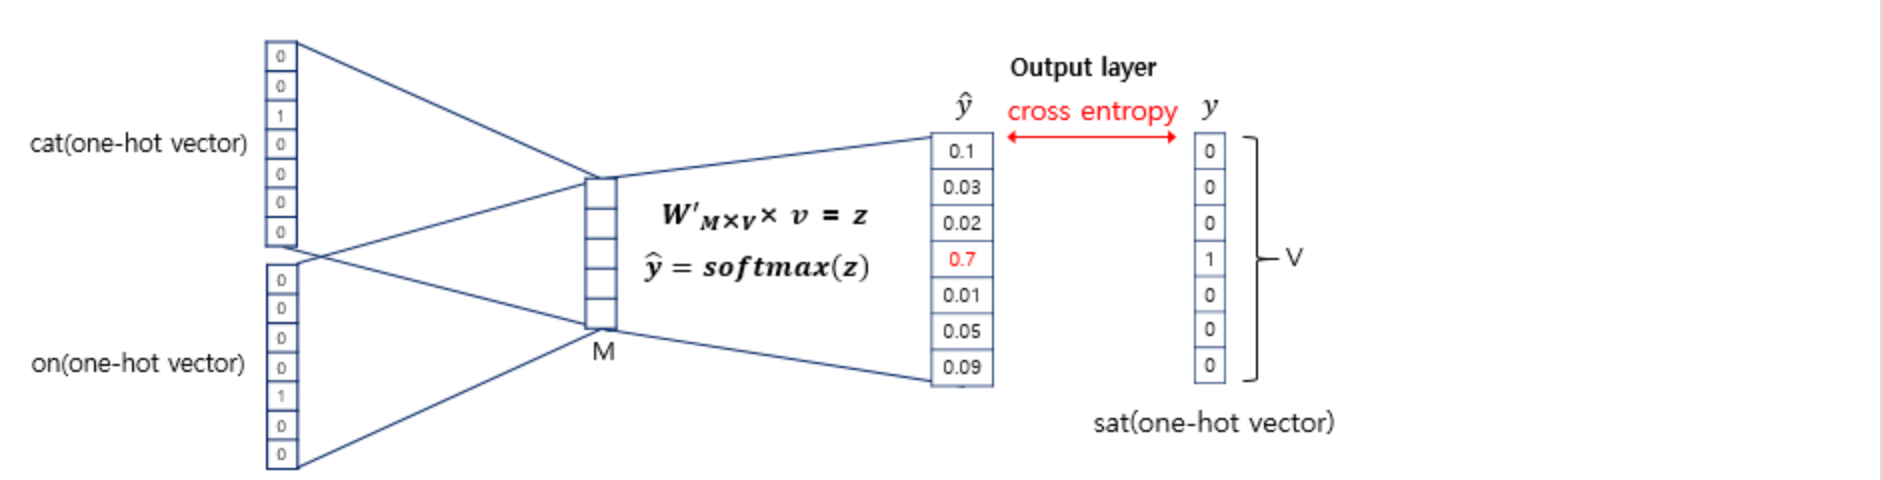

# 

# *Skip-gram*

<b>CBOW</b>는 주변 단어를 통해 중심 단어를 예측<br>
<b>Skip-gram</b>은 중심 단어에서 주변 단어를 예측<br>
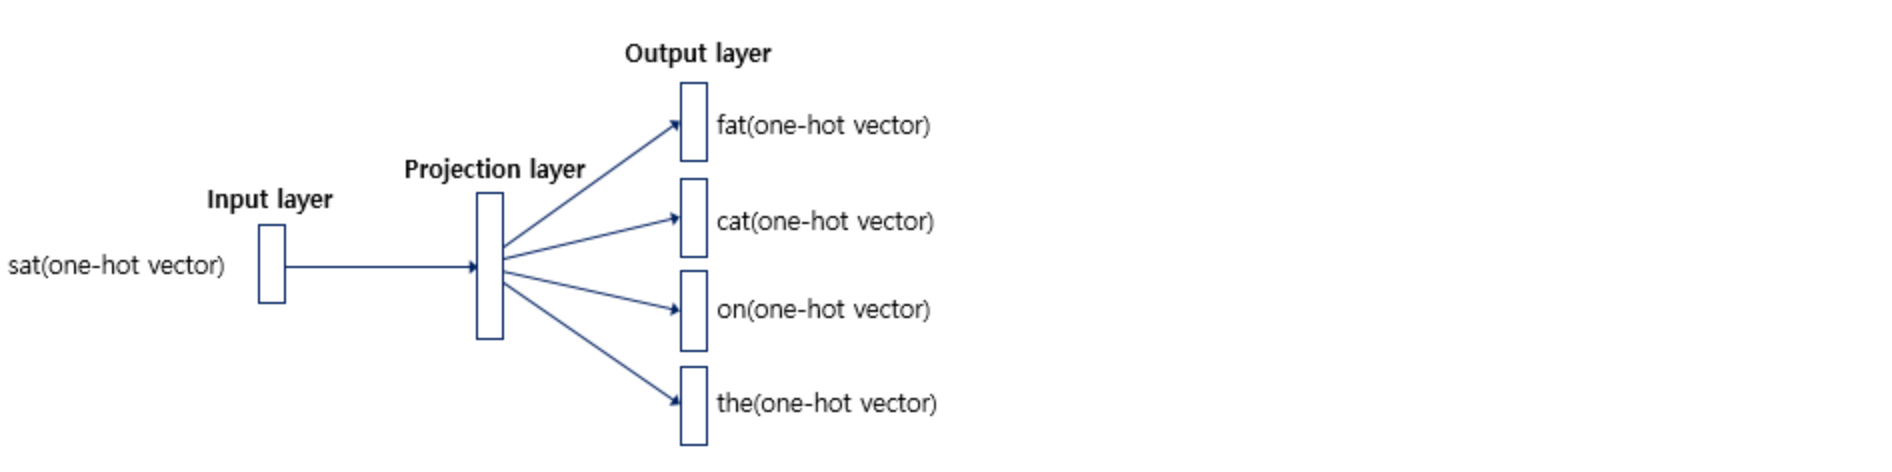

# 

# *Pretrained Word Embedding*

In [1]:
import pandas as pd
from pshmodule.utils import filemanager as fm

In [2]:
df = fm.load('/mnt/nas_storage3/shpark/practice/data/news_sentiment.csv')
df = df[['content', 'sentiment']]
df.head()

extension : .csv
Loaded 5011 records from /mnt/nas_storage3/shpark/practice/data/news_sentiment.csv


,content,sentiment
0,G7 원전사고 국경 넘어 민간인에 방사성 물질 노출 위험 무력분쟁 핵시설 파손으로 ...,부정
1,에 꽂힌 핀다 렌트리스 이어 오토론까지 보폭 확대 핀다 정상연 수석매니저 인터뷰...,긍정
2,3000명 회원에게 제각기 다른 3000개 앱이 되겠다여성 패션앱 1위 에이블리의 ...,긍정
3,항공업계 러시아 운항영공 통과 중단우회항로 이용 기사내용 요약대한항공아시아나 등 우...,부정
4,에 꽂힌 핀다 렌트리스 이어 오토론까지 보폭 확대 핀다 정상연 수석매니저 인터뷰2...,긍정


### *Processing*

In [3]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from konlpy.tag import Mecab

m = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')

In [4]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [5]:
tokenized_data = []
for sentence in tqdm(df['content']):
    tokenized_sentence = m.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████████████████████████████████| 5011/5011 [00:08<00:00, 575.82it/s]


리뷰의 최대 길이 : 3576
리뷰의 평균 길이 : 325.3312712033526


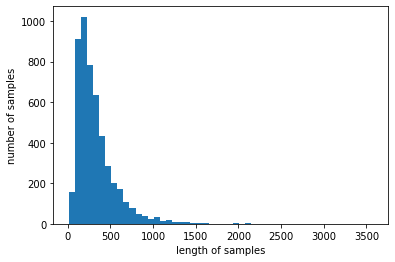

In [6]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### *Word2vec*

In [7]:
from gensim.models import Word2Vec

In [9]:
model = Word2Vec(sentences = tokenized_data,
                 # size = 100, # 워드 벡터 특징 값. 임베딩 된 벡터의 차원
                 window = 5, # 컨텍스트 왼도우 크기
                 min_count = 5, # 단어 최소 빈도수 제한
                 workers = 4, # 학습을 위한 프로세스 수
                 sg = 1 # 0 CBOW, 1 Skip-gram
                )

In [10]:
model.wv.vectors.shape # 임베딩 매트릭스 크기

(17597, 100)

In [14]:
print(model.wv.most_similar("유재석"))

[('차태현', 0.9106209874153137), ('전소민', 0.9027237296104431), ('여기저기', 0.885797381401062), ('털어놓', 0.8838733434677124), ('장난', 0.8811488747596741), ('깨달', 0.8786293864250183), ('환호', 0.8784235715866089), ('수염', 0.8769590854644775), ('그대', 0.8745935559272766), ('눈물', 0.8745602369308472)]


### *save*

In [19]:
model.wv.save_word2vec_format('/mnt/nas_storage3/shpark/practice/data/w2v') # 모델 저장

### *load*

In [21]:
from gensim.models import KeyedVectors

In [23]:
loaded_model = KeyedVectors.load_word2vec_format("/mnt/nas_storage3/shpark/practice/data/w2v") # 모델 로드

In [25]:
print(loaded_model.most_similar("유재석"))

[('차태현', 0.9106209874153137), ('전소민', 0.9027237296104431), ('여기저기', 0.885797381401062), ('털어놓', 0.8838733434677124), ('장난', 0.8811488747596741), ('깨달', 0.8786293864250183), ('환호', 0.8784235715866089), ('수염', 0.8769590854644775), ('그대', 0.8745935559272766), ('눈물', 0.8745602369308472)]


# 

# *👉🏻 Pretrained Word2Vec Model*

## *data load*

In [1]:
import pandas as pd
from pshmodule.utils import filemanager as fm

In [2]:
df = fm.load('/mnt/nas_storage3/shpark/practice/data/torchtext.csv')
df = df[['id', 'text', 'label']]
df.head()

extension : .csv
Loaded 5011 records from /mnt/nas_storage3/shpark/practice/data/torchtext.csv


,id,text,label
0,0,G7 원전사고 국경 넘어 민간인에 방사성 물질 노출 위험 무력분쟁 핵시설 파손으로 ...,부정
1,1,에 꽂힌 핀다 렌트리스 이어 오토론까지 보폭 확대 핀다 정상연 수석매니저 인터뷰...,긍정
2,2,3000명 회원에게 제각기 다른 3000개 앱이 되겠다여성 패션앱 1위 에이블리의 ...,긍정
3,3,항공업계 러시아 운항영공 통과 중단우회항로 이용 기사내용 요약대한항공아시아나 등 우...,부정
4,4,에 꽂힌 핀다 렌트리스 이어 오토론까지 보폭 확대 핀다 정상연 수석매니저 인터뷰2...,긍정


In [3]:
# train_df = df[:3500]
# test_df = df[3501:]

In [5]:
# train_df.to_csv("/mnt/nas_storage3/shpark/practice/data/train_data.csv", index=False)
# test_df.to_csv("/mnt/nas_storage3/shpark/practice/data/test_data.csv", index=False)

## *model load*

In [1]:
from gensim.models import KeyedVectors

In [2]:
model = KeyedVectors.load_word2vec_format("/mnt/nas_storage3/shpark/practice/data/w2v")

In [3]:
print(model.most_similar("유재석"))

[('차태현', 0.9106209874153137), ('전소민', 0.9027237296104431), ('여기저기', 0.885797381401062), ('털어놓', 0.8838733434677124), ('장난', 0.8811488747596741), ('깨달', 0.8786293864250183), ('환호', 0.8784235715866089), ('수염', 0.8769590854644775), ('그대', 0.8745935559272766), ('눈물', 0.8745602369308472)]


## *사전 훈련된 Word2Vec 초기 임베딩 사용*

In [4]:
import torch
import torch.nn as nn
from torchtext.vocab import Vectors
from torchtext.legacy import data, datasets
from konlpy.tag import Mecab

m = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')

#####  사전 훈련된 Word2Vec 모델을 vectors에 저장

In [5]:
vectors = Vectors(name="/mnt/nas_storage3/shpark/practice/data/w2v")

##### torchtext를 통한 실습을 진행하기 위해 두 개의 Field 객체 정의

In [6]:
ID = data.Field(sequential = False,
                use_vocab = False) # 실제 사용은 하지 않을 예정

TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=m.morphs, # tokenizer로 Mecab 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   is_target=True)

##### 데이터셋 만들기

In [7]:
from torchtext.legacy.data import TabularDataset

In [11]:
train_data, test_data = TabularDataset.splits(
    path='/mnt/nas_storage3/shpark/practice/data',
    train='train_data.csv',
    test='test_data.csv',
    format='csv',
    fields=[('id', ID), ('text', TEXT), ('label', LABEL)],
    skip_header=True
)

In [12]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 3500
테스트 샘플의 개수 : 1510


In [13]:
print(vars(train_data[0]))

{'id': '0', 'text': ['g', '7', '원전', '사고', '국경', '넘', '어', '민간인', '에', '방사성', '물질', '노출', '위험', '무력', '분쟁', '핵시설', '파손', '으로', '인한', '민간', '인', '위험', '극', '적', '으로', '높여', '이율', '특파원', '주요', '7', '개국', '비확산', '책임', '자그룹', '은', '15', '일', '우크라이나', '의', '핵안', '전체', '제', '와', '관련', '해', '성명', '을', '내', '고', '우크라', '이나', '핵시설', '인근', '에', '대한', '러시아', '의', '공격', '에', '대해', '깊', '은', '우려', '를', '표', '하', '면서', '핵시설', '안전', '을', '위태', '롭', '게', '하', '는', '어떤', '조처', '도', '규탄', '한다고', '밝혔', '다', '우크라', '북부', '체르노빌', '원전', '경비', '하', '는', '러시아군', '러시아군', '병사', '가', '7', '일', '우크라', '이나', '북부', '프리', '피', '야', '트', '에', '있', '는', '체르노빌', '원자력발전소', '앞', '에서', '경계', '근무', '를', '하', '고', '있', '다', '2022', '3', '8', 'jsmoonyna', '이', '들', '은', '무력', '분쟁', '와중', '핵시설', '파손', '으로', '민간인', '이', '위험', '에', '빠질', '가능', '성', '이', '극', '적', '으로', '높', '아', '지', '고', '원전', '사고', '로', '민간인', '과', '환경', '이', '방사성', '물질', '에', '노출', '될', '위험', '은', '어떤', '국가', '의', '국경', '도', '넘', '어', '선다고', '지적', '했', '다', 

##### Word2Vec 모델을 임베딩 벡터값으로 초기화

In [14]:
TEXT.build_vocab(train_data, # dataset
                 vectors=vectors, # 만들어진 단어 집합의 각 단어의 임베딩 벡터값으로 pretrained word2vec에 저장되있던 임베딩 벡터값들로 초기화
                 max_size=10000, # 단어 집합 크기 제한
                 min_freq=10) # 등장 빈도수가 10번 이상인 단어만 허용

In [16]:
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 9063


In [19]:
print(TEXT.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f1951f228e0>>, {'<unk>': 0, '<pad>': 1, '을': 2, '는': 3, '다': 4, '이': 5, '에': 6, '를': 7, '하': 8, '의': 9, '은': 10, '있': 11, '가': 12, '한': 13, '고': 14, '으로': 15, '했': 16, '에서': 17, '로': 18, '과': 19, '도': 20, '등': 21, '수': 22, '일': 23, '할': 24, '와': 25, '들': 26, '해': 27, '적': 28, '것': 29, '인': 30, '만': 31, '년': 32, '1': 33, '게': 34, '기': 35, '되': 36, '2': 37, '다고': 38, '기업': 39, '명': 40, '3': 41, '원': 42, '된': 43, '지': 44, '면': 45, '한다': 46, '어': 47, '월': 48, '서비스': 49, '통해': 50, '화': 51, '며': 52, '까지': 53, '됐': 54, '성': 55, '억': 56, '밝혔': 57, '지원': 58, '중': 59, '5': 60, '4': 61, '투자': 62, '받': 63, '사업': 64, '기술': 65, '었': 66, '개': 67, '않': 68, '라고': 69, '부터': 70, '러시아': 71, '시장': 72, '자': 73, '대': 74, '제공': 75, '말': 76, '천': 77, '위해': 78, '대한': 79, '플랫폼': 80, '대표': 81, '된다': 82, '다는': 83, '이번': 84, '개발': 85, '아': 86, '가능': 87, '미국': 88, '에게': 89, '위한': 90, '진행': 91, '면서': 92, '이상': 93, '국내': 9

In [20]:
print('임베딩 벡터의 개수와 차원 : {} '.format(TEXT.vocab.vectors.shape))

임베딩 벡터의 개수와 차원 : torch.Size([9063, 100]) 


In [30]:
print('임베딩 벡터 : {} '.format(TEXT.vocab.vectors))

임베딩 벡터 : tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.2155,  0.0941, -0.1949,  ..., -0.0339,  0.0733,  0.1614],
        ...,
        [ 0.0245,  0.2723, -0.0214,  ..., -0.0235,  0.0646,  0.1154],
        [ 0.0652,  0.2121, -0.0095,  ..., -0.1516,  0.3395, -0.2327],
        [-0.1941,  0.4473,  0.1926,  ..., -0.1369,  0.1967, -0.1383]]) 


##### 각 단어의 임베딩 벡터값을 출력

In [21]:
# <unk>의 임베딩 벡터값
print(TEXT.vocab.vectors[0])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])


In [22]:
# <pad>의 임베딩 벡터값
print(TEXT.vocab.vectors[1])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])


unk, pad 모두 임베딩 벡터값이 0으로 초기화<br>
unk, pad는 실제 단어가 아닌 특별 토큰

In [28]:
print(TEXT.vocab.vectors[50]) # 단어 '동해'의 임베딩 벡터값

tensor([-0.0297,  0.3633,  0.2343, -0.3922, -0.0118, -0.6940,  0.2997,  0.1204,
        -0.4910, -0.0273,  0.1704, -0.0648,  0.0195,  0.0802, -0.1249, -0.3245,
         0.1661, -0.2322,  0.1313,  0.2030, -0.5612, -0.0687,  0.2986, -0.1767,
        -0.0077,  0.6416, -0.1663,  0.0700, -0.1322, -0.0715,  0.2955, -0.2333,
         0.2361, -0.0591,  0.0057, -0.1219, -0.4359, -0.0986, -0.6069, -0.4270,
         0.0480, -0.0059, -0.3181,  0.2945,  0.0727,  0.2362, -0.2071, -0.4501,
        -0.0614,  0.0907,  0.7040, -0.3456, -0.1843, -0.7886,  0.4581,  0.2745,
         0.3845, -0.2070, -0.1000, -0.7480,  0.1215,  0.6450,  0.1743, -0.2836,
        -0.4470,  0.4063, -0.2289,  0.2920, -0.3685, -0.0415, -0.3796,  0.0394,
         0.5991,  0.6009,  0.9422,  0.2165,  0.0085, -0.2874, -0.3313, -0.0373,
        -0.3698,  0.1476,  0.1768,  0.0033, -0.2056, -0.0307, -0.1389,  0.0223,
        -0.0553, -0.4680, -0.4530,  0.7645,  0.0523,  0.0559,  0.3162, -0.0947,
         0.1666,  0.1019,  0.1658, -0.21

## *임베딩 추가*

In [31]:
embedding_layer = nn.Embedding.from_pretrained(TEXT.vocab.vectors, freeze=False)

In [32]:
print(embedding_layer(torch.LongTensor([50]))) # 단어 '동해'의 임베딩 벡터값

tensor([[-0.0297,  0.3633,  0.2343, -0.3922, -0.0118, -0.6940,  0.2997,  0.1204,
         -0.4910, -0.0273,  0.1704, -0.0648,  0.0195,  0.0802, -0.1249, -0.3245,
          0.1661, -0.2322,  0.1313,  0.2030, -0.5612, -0.0687,  0.2986, -0.1767,
         -0.0077,  0.6416, -0.1663,  0.0700, -0.1322, -0.0715,  0.2955, -0.2333,
          0.2361, -0.0591,  0.0057, -0.1219, -0.4359, -0.0986, -0.6069, -0.4270,
          0.0480, -0.0059, -0.3181,  0.2945,  0.0727,  0.2362, -0.2071, -0.4501,
         -0.0614,  0.0907,  0.7040, -0.3456, -0.1843, -0.7886,  0.4581,  0.2745,
          0.3845, -0.2070, -0.1000, -0.7480,  0.1215,  0.6450,  0.1743, -0.2836,
         -0.4470,  0.4063, -0.2289,  0.2920, -0.3685, -0.0415, -0.3796,  0.0394,
          0.5991,  0.6009,  0.9422,  0.2165,  0.0085, -0.2874, -0.3313, -0.0373,
         -0.3698,  0.1476,  0.1768,  0.0033, -0.2056, -0.0307, -0.1389,  0.0223,
         -0.0553, -0.4680, -0.4530,  0.7645,  0.0523,  0.0559,  0.3162, -0.0947,
          0.1666,  0.1019,  